In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from data_stats import read_unicef_data, check_missing_values, clean_unicef_data
csv_file = 'UNICEF_IND.csv'

# 1. Read Dataset 
df = read_unicef_data(csv_file)

# 2. Check for missing values 
missing_values = check_missing_values(csv_file)
print("Missing Values:\n", missing_values)

# 3. Clean the dataset 
cleaned_df = clean_unicef_data(df)

# Display the first few rows of the cleaned DataFrame to verify the result
cleaned_df.head()

Missing Values:
 DATAFLOW                            0
REF_AREA:Geographic area            0
INDICATOR:Indicator                 0
SEX:Sex                             0
WEALTH_QUINTILE:Wealth Quintile     0
TIME_PERIOD:Time period             0
OBS_VALUE:Observation Value         0
DATA_SOURCE:Data Source             0
COUNTRY_NOTES:Country notes         0
UNIT_MEASURE:Unit of measure        0
REF_PERIOD:Reference Period        52
LOWER_BOUND:Lower Bound             0
UPPER_BOUND:Upper Bound             0
OBS_STATUS:Observation Status       0
dtype: int64


,Year,Neonatal_Mortality_Rate,Sex,Wealth_Quintile,Indicator,Country_Notes,Unit_Measure,Lower_Bound,Upper_Bound
0,1970,84.949849,_T: Total,_T: Total,CME_MRM0: Neonatal mortality rate,The most recent national official estimate of ...,"D_PER_1000_B: Deaths per 1,000 live births",78.371977,92.136310
1,1971,84.217018,_T: Total,_T: Total,CME_MRM0: Neonatal mortality rate,The most recent national official estimate of ...,"D_PER_1000_B: Deaths per 1,000 live births",78.045814,91.113473
2,1972,83.481996,_T: Total,_T: Total,CME_MRM0: Neonatal mortality rate,The most recent national official estimate of ...,"D_PER_1000_B: Deaths per 1,000 live births",77.508706,90.030670
3,1973,82.564652,_T: Total,_T: Total,CME_MRM0: Neonatal mortality rate,The most recent national official estimate of ...,"D_PER_1000_B: Deaths per 1,000 live births",76.778730,88.917560
4,1974,81.527559,_T: Total,_T: Total,CME_MRM0: Neonatal mortality rate,The most recent national official estimate of ...,"D_PER_1000_B: Deaths per 1,000 live births",75.995238,87.594828


In [3]:
# Check and clean column names
cleaned_df.columns = cleaned_df.columns.str.strip()  # Removes leading/trailing whitespaces

In [4]:
cleaned_df.columns

Index(['Year', 'Neonatal_Mortality_Rate', 'Sex', 'Wealth_Quintile',
       'Indicator', 'Country_Notes', 'Unit_Measure', 'Lower_Bound',
       'Upper_Bound'],
      dtype='object')

In [5]:
# cleaned column names
summary_stats = cleaned_df[['Neonatal_Mortality_Rate', 'Lower_Bound', 'Upper_Bound']].describe()
print(summary_stats)

       Neonatal_Mortality_Rate  Lower_Bound  Upper_Bound
count                52.000000    52.000000    52.000000
mean                 51.256941    48.094128    54.622851
std                  20.199464    18.906358    21.647633
min                  19.118430    17.060275    21.379132
25%                  33.914185    31.772386    36.151888
50%                  50.544255    47.772095    53.424821
75%                  67.992545    64.119518    72.252956
max                  84.949849    78.371977    92.136310


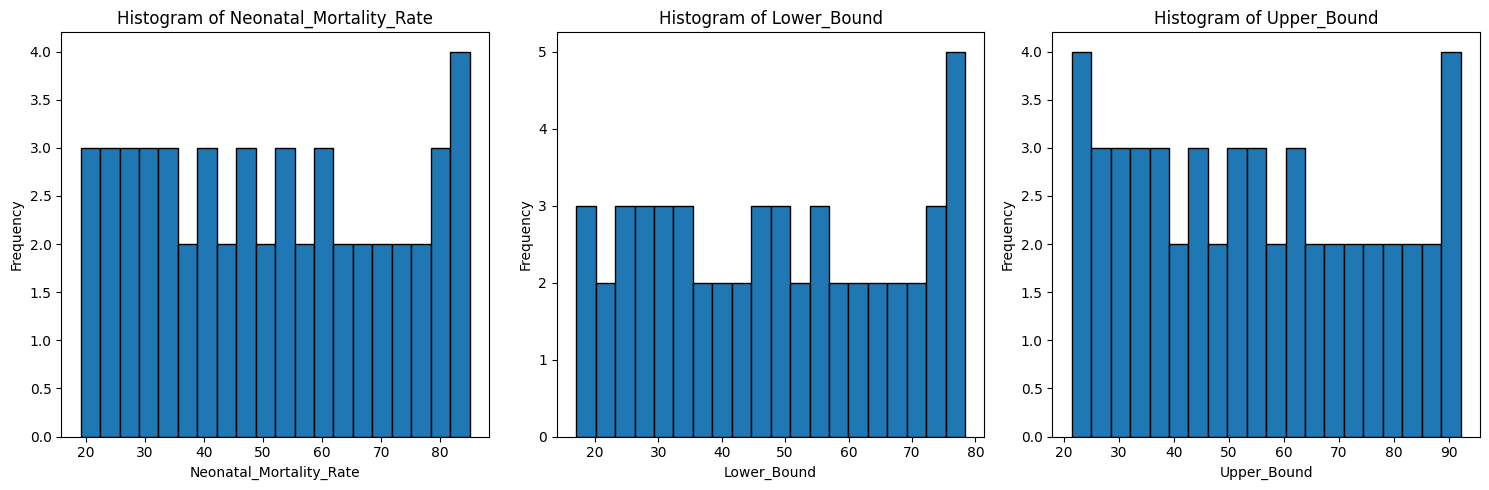

In [6]:
# histograms for Neonatal_Mortality_Rate, Lower_Bound, and Upper_Bound
plt.figure(figsize=(15, 5)) 

# subplot for Neonatal_Mortality_Rate
plt.subplot(1, 3, 1)
plt.hist(cleaned_df['Neonatal_Mortality_Rate'], bins=20, edgecolor='k')
plt.xlabel('Neonatal_Mortality_Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Neonatal_Mortality_Rate')

# subplot for Lower_Bound
plt.subplot(1, 3, 2)
plt.hist(cleaned_df['Lower_Bound'], bins=20, edgecolor='k')
plt.xlabel('Lower_Bound')
plt.ylabel('Frequency')
plt.title('Histogram of Lower_Bound')

# subplot for Upper_Bound
plt.subplot(1, 3, 3)
plt.hist(cleaned_df['Upper_Bound'], bins=20, edgecolor='k')
plt.xlabel('Upper_Bound')
plt.ylabel('Frequency')
plt.title('Histogram of Upper_Bound')

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()

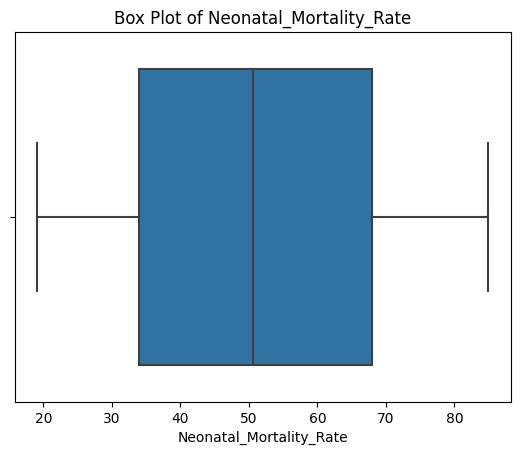

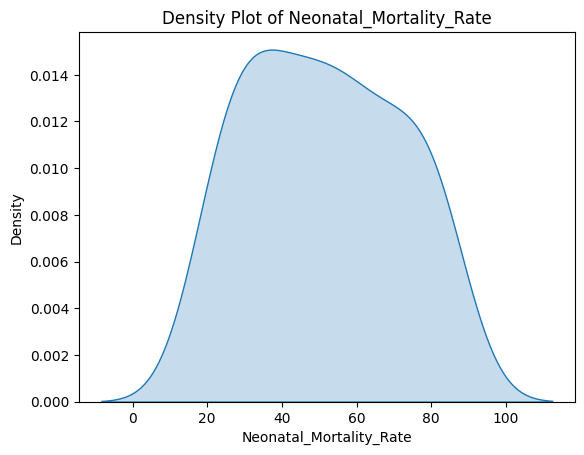

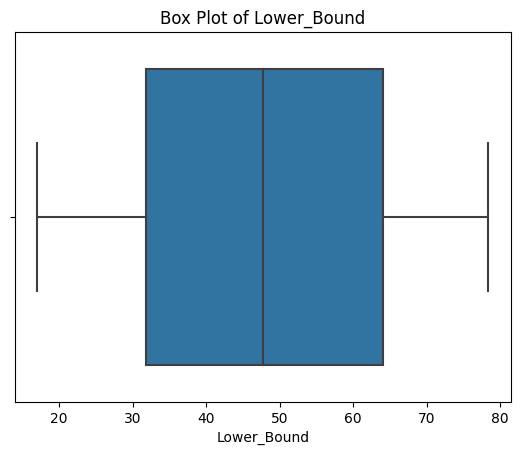

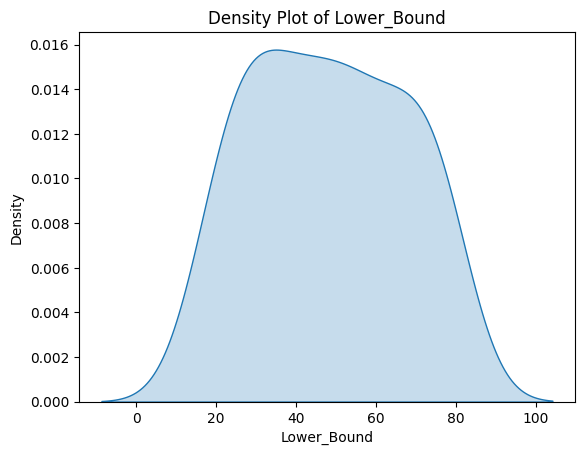

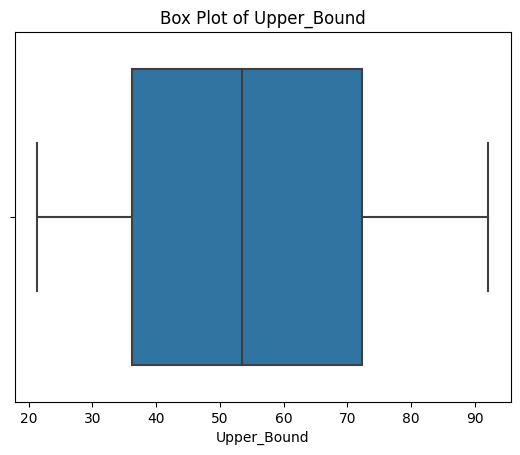

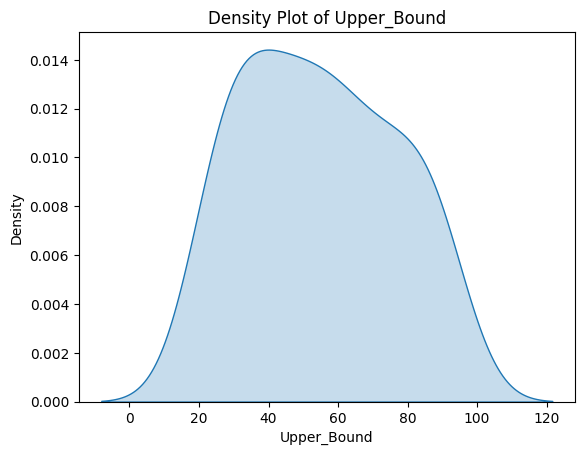

<Figure size 640x480 with 0 Axes>

In [7]:
# box plot for Neonatal_Mortality_Rate
sns.boxplot(data=cleaned_df, x='Neonatal_Mortality_Rate')
plt.title('Box Plot of Neonatal_Mortality_Rate')
plt.show()

# density plot for Neonatal_Mortality_Rate
sns.kdeplot(cleaned_df['Neonatal_Mortality_Rate'], fill=True)
plt.xlabel('Neonatal_Mortality_Rate')
plt.title('Density Plot of Neonatal_Mortality_Rate')
plt.show()

# box plot for Lower_Bound
sns.boxplot(data=cleaned_df, x='Lower_Bound')
plt.title('Box Plot of Lower_Bound')
plt.show()

# density plot for Lower_Bound
sns.kdeplot(cleaned_df['Lower_Bound'], fill=True)
plt.xlabel('Lower_Bound')
plt.title('Density Plot of Lower_Bound')
plt.show()

# box plot for Upper_Bound
sns.boxplot(data=cleaned_df, x='Upper_Bound')
plt.title('Box Plot of Upper_Bound')
plt.show()

# density plot for Upper_Bound
sns.kdeplot(cleaned_df['Upper_Bound'], fill=True)
plt.xlabel('Upper_Bound')
plt.title('Density Plot of Upper_Bound')
plt.show()

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()

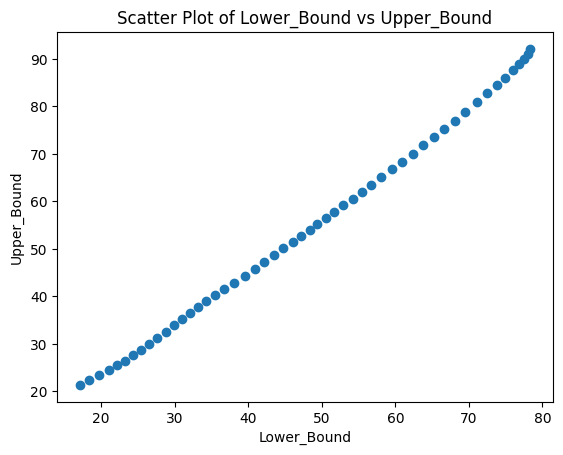

In [8]:
# scatter plot to visualize outliers
plt.scatter(cleaned_df['Lower_Bound'], cleaned_df['Upper_Bound'])
plt.xlabel('Lower_Bound')
plt.ylabel('Upper_Bound')
plt.title('Scatter Plot of Lower_Bound vs Upper_Bound')
plt.show()

In [9]:
from scipy import stats

# Calculate z-scores for Neonatal_Mortality_Rate
z_scores = stats.zscore(cleaned_df['Neonatal_Mortality_Rate'])

# Define a threshold for outlier detection
threshold = 3

# Identify and filter outliers
outliers = cleaned_df[abs(z_scores) > threshold]
print("Outliers:")
print(outliers)


Outliers:
Empty DataFrame
Columns: [Year, Neonatal_Mortality_Rate, Sex, Wealth_Quintile, Indicator, Country_Notes, Unit_Measure, Lower_Bound, Upper_Bound]
Index: []


In [10]:
from scipy import stats

# Calculate z-scores for Lower_Bound and Upper_Bound
z_scores_lower_bound = stats.zscore(cleaned_df['Lower_Bound'])
z_scores_upper_bound = stats.zscore(cleaned_df['Upper_Bound'])

# Define a threshold for outlier detection
threshold = 3

# Identify and filter outliers for Lower_Bound
outliers_lower_bound = cleaned_df[abs(z_scores_lower_bound) > threshold]

# Identify and filter outliers for Upper_Bound
outliers_upper_bound = cleaned_df[abs(z_scores_upper_bound) > threshold]

print("Outliers in Lower_Bound:")
print(outliers_lower_bound)

print("Outliers in Upper_Bound:")
print(outliers_upper_bound)


Outliers in Lower_Bound:
Empty DataFrame
Columns: [Year, Neonatal_Mortality_Rate, Sex, Wealth_Quintile, Indicator, Country_Notes, Unit_Measure, Lower_Bound, Upper_Bound]
Index: []
Outliers in Upper_Bound:
Empty DataFrame
Columns: [Year, Neonatal_Mortality_Rate, Sex, Wealth_Quintile, Indicator, Country_Notes, Unit_Measure, Lower_Bound, Upper_Bound]
Index: []


In [11]:
# Calculate correlation matrix
correlation_matrix = cleaned_df[['Neonatal_Mortality_Rate', 'Lower_Bound', 'Upper_Bound']].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                         Neonatal_Mortality_Rate  Lower_Bound  Upper_Bound
Neonatal_Mortality_Rate                 1.000000     0.999768     0.999738
Lower_Bound                             0.999768     1.000000     0.999020
Upper_Bound                             0.999738     0.999020     1.000000


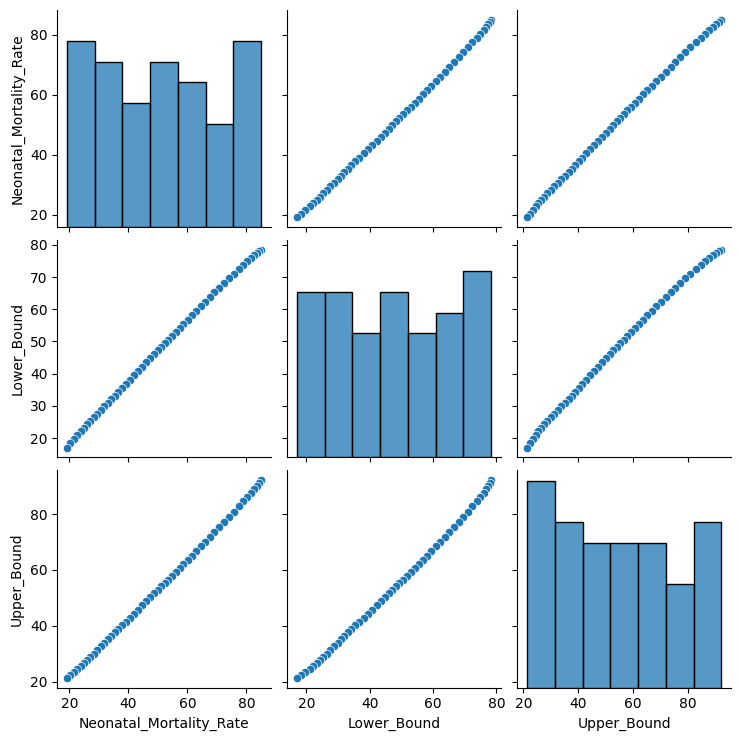

In [12]:
# scatter plot matrix
sns.pairplot(cleaned_df[['Neonatal_Mortality_Rate', 'Lower_Bound', 'Upper_Bound']])
plt.show()